<a href="https://colab.research.google.com/github/Raybarreto/Hackathon/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracão

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Telecom_churn.csv'
df = pd.read_csv(file_path, encoding='latin-1', sep=',', low_memory=False)
print("Dados extraídos com sucesso:")

Dados extraídos com sucesso:


# 1. Carga de Dados

In [ ]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [ ]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [ ]:
print("\n--- Informações do Dataset (dtypes e nulos) ---")
df.info()


--- Informações do Dataset (dtypes e nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     1

In [ ]:
print("\n--- Análise da Variável churn ---")
print("\nContagem de Churn (0: Não Evadiu, 1: Evadiu):")
churn_counts = df['churn'].value_counts()
print(churn_counts.to_markdown(numalign="left", stralign="left"))
print("\n")

print("\nPercentual de Churn:")
churn_percentage = df['churn'].value_counts(normalize=True) * 100
print(churn_percentage.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))
print("\n")


--- Análise da Variável churn ---

Contagem de Churn (0: Não Evadiu, 1: Evadiu):
| churn   | count   |
|:--------|:--------|
| 0       | 50438   |
| 1       | 49562   |



Percentual de Churn:
| churn   | proportion   |
|:--------|:-------------|
| 0       | 50.44        |
| 1       | 49.56        |




# 2. Limpeza e Pré-processamento (Dados Ausentes)

In [ ]:
print("--- Verificando Inconsistências nos Dados ---")
print("\nContagem de valores ausentes por coluna antes do tratamento:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

--- Verificando Inconsistências nos Dados ---

Contagem de valores ausentes por coluna antes do tratamento:
|                  | 0     |
|:-----------------|:------|
| rev_Mean         | 357   |
| mou_Mean         | 357   |
| totmrc_Mean      | 357   |
| da_Mean          | 357   |
| ovrmou_Mean      | 357   |
| ovrrev_Mean      | 357   |
| vceovr_Mean      | 357   |
| datovr_Mean      | 357   |
| roam_Mean        | 357   |
| change_mou       | 891   |
| change_rev       | 891   |
| drop_vce_Mean    | 0     |
| drop_dat_Mean    | 0     |
| blck_vce_Mean    | 0     |
| blck_dat_Mean    | 0     |
| unan_vce_Mean    | 0     |
| unan_dat_Mean    | 0     |
| plcd_vce_Mean    | 0     |
| plcd_dat_Mean    | 0     |
| recv_vce_Mean    | 0     |
| recv_sms_Mean    | 0     |
| comp_vce_Mean    | 0     |
| comp_dat_Mean    | 0     |
| custcare_Mean    | 0     |
| ccrndmou_Mean    | 0     |
| cc_mou_Mean      | 0     |
| inonemin_Mean    | 0     |
| threeway_Mean    | 0     |
| mou_cvce_Mean    | 0

In [ ]:
cols_low_missing = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
                    'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'eqpdays']

for col in cols_low_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

df['dualband'] = df['dualband'].fillna(df['dualband'].mode()[0])
df['refurb_new'] = df['refurb_new'].fillna(df['refurb_new'].mode()[0])
df['phones'] = df['phones'].fillna(df['phones'].median())
df['models'] = df['models'].fillna(df['models'].median())

In [ ]:
cols_avg6 = ['avg6mou', 'avg6qty', 'avg6rev']
for col in cols_avg6:
    df[col] = df[col].fillna(0)

In [ ]:
cols_categ_missing = ['prizm_social_one', 'area', 'hnd_webcap', 'ownrent', 'dwlltype',
                      'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd',
                      'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']

for col in cols_categ_missing:
    df[col] = df[col].fillna('Missing')

In [ ]:
cols_num_missing = ['truck', 'rv', 'lor', 'adults', 'income', 'numbcars', 'forgntvl']

for col in cols_num_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [ ]:
print("--- Verificando Inconsistências nos Dados ---")
print("\nContagem de valores ausentes por coluna após tratamento:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

--- Verificando Inconsistências nos Dados ---

Contagem de valores ausentes por coluna após tratamento:
|                  | 0   |
|:-----------------|:----|
| rev_Mean         | 0   |
| mou_Mean         | 0   |
| totmrc_Mean      | 0   |
| da_Mean          | 0   |
| ovrmou_Mean      | 0   |
| ovrrev_Mean      | 0   |
| vceovr_Mean      | 0   |
| datovr_Mean      | 0   |
| roam_Mean        | 0   |
| change_mou       | 0   |
| change_rev       | 0   |
| drop_vce_Mean    | 0   |
| drop_dat_Mean    | 0   |
| blck_vce_Mean    | 0   |
| blck_dat_Mean    | 0   |
| unan_vce_Mean    | 0   |
| unan_dat_Mean    | 0   |
| plcd_vce_Mean    | 0   |
| plcd_dat_Mean    | 0   |
| recv_vce_Mean    | 0   |
| recv_sms_Mean    | 0   |
| comp_vce_Mean    | 0   |
| comp_dat_Mean    | 0   |
| custcare_Mean    | 0   |
| ccrndmou_Mean    | 0   |
| cc_mou_Mean      | 0   |
| inonemin_Mean    | 0   |
| threeway_Mean    | 0   |
| mou_cvce_Mean    | 0   |
| mou_cdat_Mean    | 0   |
| mou_rvce_Mean    | 0   |
| owy

# 3. Engenharia de Features

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n--- Colunas Categóricas a Codificar ---")
print(categorical_cols)


--- Colunas Categóricas a Codificar ---
['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


In [ ]:
cols_to_drop = ['Customer_ID', 'crclscod']

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Defini o target (Y) e as features (X)
X = df.drop('churn', axis=1)
y = df['churn']

# Aplica One-Hot Encoding nas colunas categóricas restantes
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

print(f"\nNúmero de Features antes do Encoding: {len(X.columns)}")
print(f"Número de Features após o One-Hot Encoding: {len(X_encoded.columns)}")


Número de Features antes do Encoding: 97
Número de Features após o One-Hot Encoding: 172


In [ ]:
# Resultado final da preparação
print("\n--- Resultado da Preparação dos Dados ---")
print(f"Dataset de Features (X_encoded) pronto com {len(X_encoded.columns)} colunas (Features).")
print(f"As 5 primeiras linhas do X_encoded (Features):\n")
display(X_encoded.head())

print(f"\nVariável Target (y) pronta com {len(y)} registros.")
print(f"Os 5 primeiros valores do y (Target):\n{y.head()}")


--- Resultado da Preparação dos Dados ---
Dataset de Features (X_encoded) pronto com 172 colunas (Features).
As 5 primeiras linhas do X_encoded (Features):



,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,True,False,True,False,True,False,True,False,False,True
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,True,False,True,False,True,False,True,False,False,True
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,False,True,True,False,True,False,True,False,False,True
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,True,False,True,False,True,False,True,False,False,True
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,True,False,True,False,True,False,True,False,False,True



Variável Target (y) pronta com 100000 registros.
Os 5 primeiros valores do y (Target):
0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64


# 4. Correlação e seleção de variáveis

In [ ]:
df_final = X_encoded.copy()
df_final['churn'] = y

print("\n--- Top 30 Features Mais Correlacionadas com o CHURN (Positivas) ---")
correlations = df_final.corr()['churn'].sort_values(ascending=False)
print(correlations[1:31])

print("\n--- Top 30 Features Mais Correlacionadas com o CHURN (Negativas) ---")
print(correlations.tail(30))


--- Top 30 Features Mais Correlacionadas com o CHURN (Positivas) ---
eqpdays                               0.112693
hnd_webcap_WC                         0.054042
uniqsubs                              0.039882
ethnic_O                              0.035643
refurb_new_R                          0.031788
area_NORTHWEST/ROCKY MOUNTAIN AREA    0.031252
marital_U                             0.026300
infobase_Missing                      0.025760
vceovr_Mean                           0.023617
dwllsize_Missing                      0.023196
ovrrev_Mean                           0.023125
HHstatin_Missing                      0.022285
dwlltype_Missing                      0.021938
months                                0.020991
actvsubs                              0.019686
ovrmou_Mean                           0.019142
creditcd_N                            0.016987
prizm_social_one_R                    0.014270
area_SOUTH FLORIDA AREA               0.014108
area_CALIFORNIA NORTH AREA           

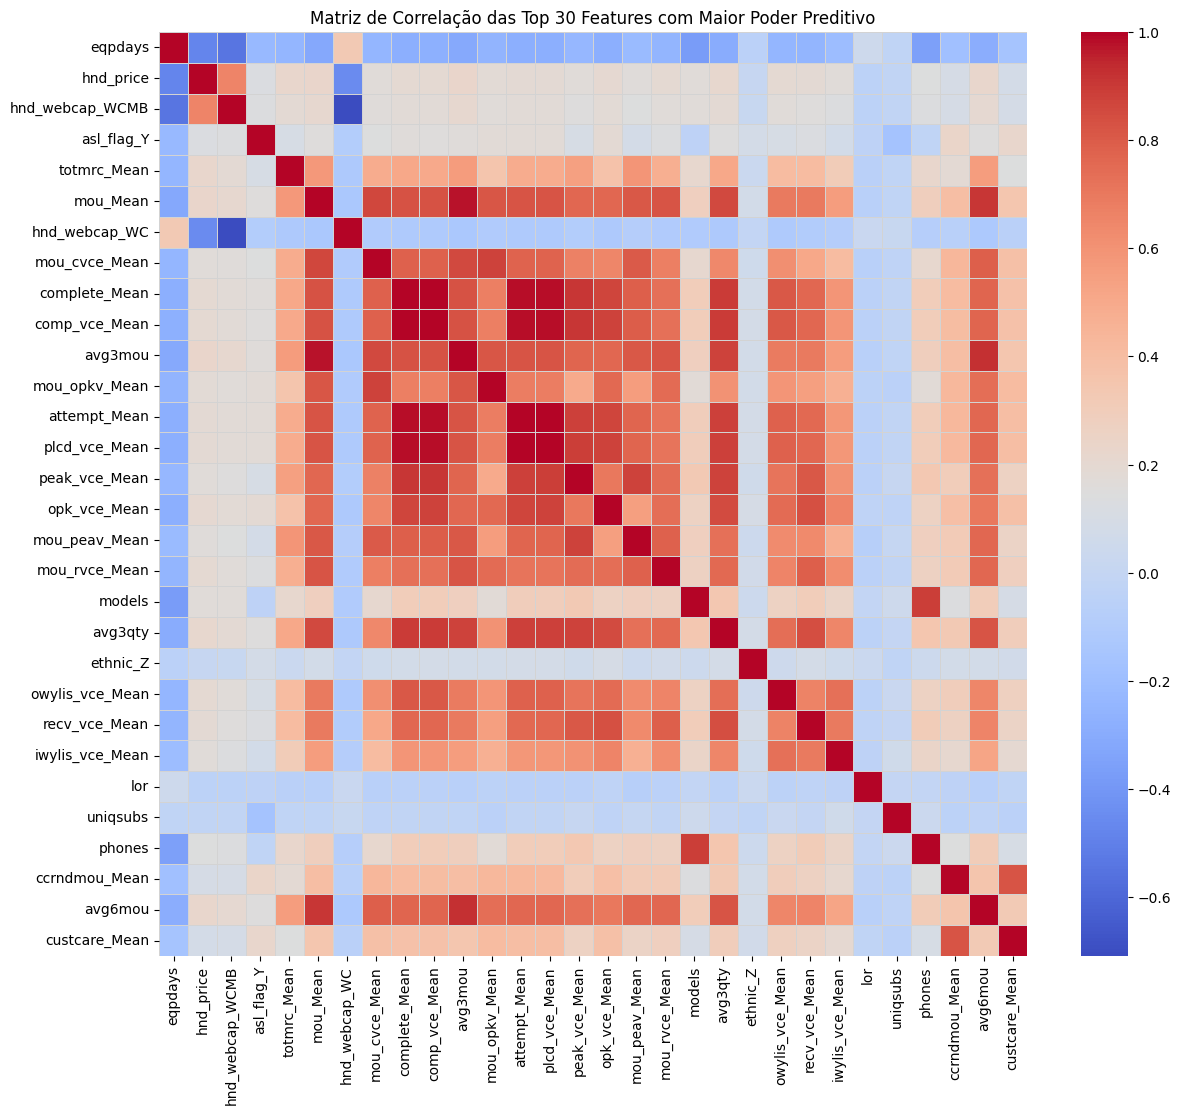

In [ ]:
top_30_features = correlations.abs().sort_values(ascending=False).head(31).index.tolist()
if 'churn' in top_30_features:
    top_30_features.remove('churn')

plt.figure(figsize=(14, 12))
sns.heatmap(df_final[top_30_features].corr(), annot=False, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, linecolor='lightgray')
plt.title('Matriz de Correlação das Top 30 Features com Maior Poder Preditivo')
plt.show()

# 5. Treinamento e Avaliação do Modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

print("\n--- Divisão e Escalonamento Concluídos ---")
print(f"Treino (Scaled): {X_train_scaled.shape}")
print(f"Teste (Scaled): {X_test_scaled.shape}")


--- Divisão e Escalonamento Concluídos ---
Treino (Scaled): (80000, 172)
Teste (Scaled): (20000, 172)


In [ ]:
#--- Treinamento: Random Forest ---
start_time_rf = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
end_time_rf = time.time()

# Previsões
y_pred_rf = rf_model.predict(X_test_scaled)


--- Random Forest ---
Tempo de Treinamento: 82.77 segundos
Acurácia: 0.6203
Precisão: 0.6222
Recall (Sensibilidade): 0.6087
F1-Score: 0.6154

Matriz de Confusão:
[[6333 3688]
 [3905 6074]]


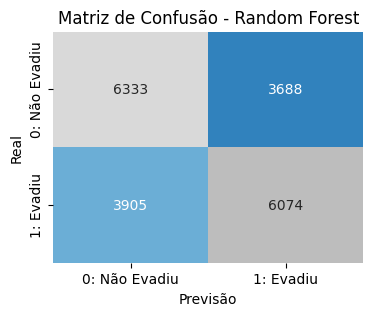

In [ ]:
# --- Métricas de desempenho ---
def evaluate_model(y_test, y_pred, model_name, train_time):
    """Calcula e exibe as métricas de desempenho."""
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Tempo de Treinamento: {train_time:.2f} segundos")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall (Sensibilidade): {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nMatriz de Confusão:")
    print(cm)


    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='tab20c', cbar=False,
                xticklabels=['0: Não Evadiu', '1: Evadiu'],
                yticklabels=['0: Não Evadiu', '1: Evadiu'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Previsão')
    plt.show()

    # Avaliar e exibir as métricas
evaluate_model(y_test, y_pred_rf, "Random Forest", end_time_rf - start_time_rf)
best_model = rf_model

In [ ]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\n--- Top 15 Features Mais Importantes (Random Forest) ---")
print(feature_importance_df.head(15).to_string(index=False))
print("-" * 65)


--- Top 15 Features Mais Importantes (Random Forest) ---
   Feature  Importance
   eqpdays    0.031802
change_mou    0.024365
    months    0.023552
  mou_Mean    0.020177
change_rev    0.019678
    adjrev    0.019623
    totrev    0.019343
    avgrev    0.019316
    avgqty    0.019204
    avgmou    0.019143
  rev_Mean    0.018161
  totcalls    0.018145
    adjmou    0.017884
    adjqty    0.017790
    totmou    0.017746
-----------------------------------------------------------------


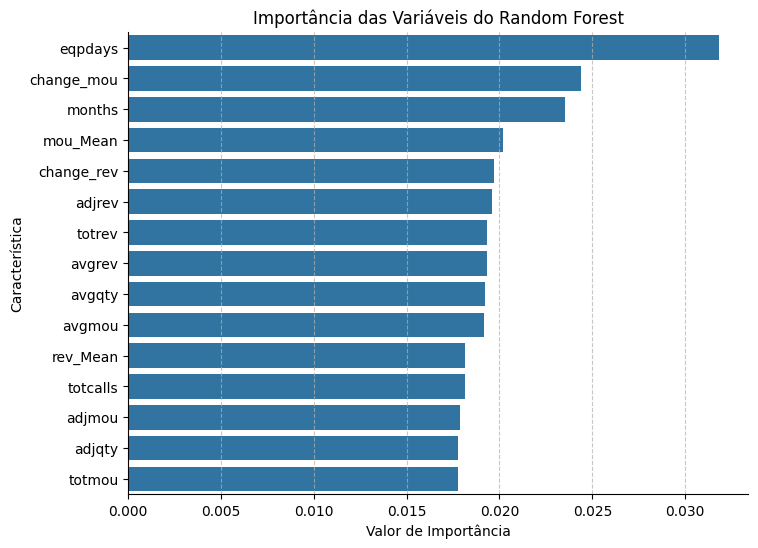

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Importância das Variáveis do Random Forest')
plt.xlabel('Valor de Importância')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- Avaliação do Modelo: {model_name} ---")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 90)

# Avaliando Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Avaliação do Modelo: Random Forest ---
Acurácia: 0.6203
Precisão: 0.6222
Recall: 0.6087
F1-score: 0.6154

Matriz de Confusão:
[[6333 3688]
 [3905 6074]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63     10021
           1       0.62      0.61      0.62      9979

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000

------------------------------------------------------------------------------------------


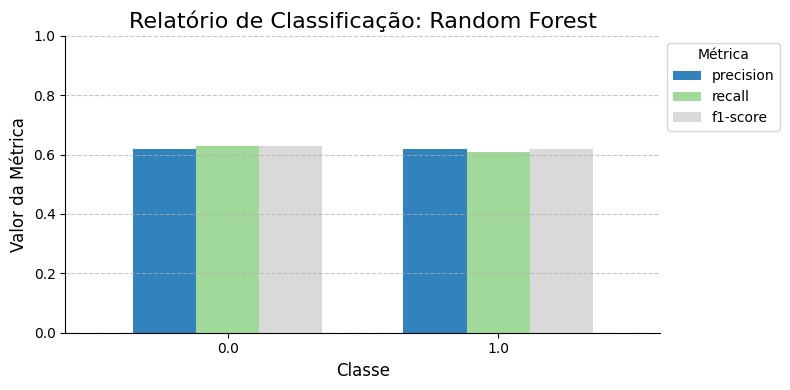

In [ ]:
# Dados do relatório de classificação do Random Forest
rf_report = {
    "precision": {"0.0": 0.62, "1.0": 0.62},
    "recall": {"0.0": 0.63, "1.0": 0.61},
    "f1-score": {"0.0": 0.63, "1.0": 0.62},
    "support": {"0.0": 10021, "1.0": 9979}
}

df_rf_report = pd.DataFrame(rf_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_rf_report.plot(kind='bar', ax=ax, width=0.7, colormap='tab20c')
ax.set_title('Relatório de Classificação: Random Forest', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

#6. Serialização do modelo

In [ ]:
final_model = best_model
final_scaler = scaler

joblib.dump(final_model, 'modelo_churn_final.joblib')
print("\nModelo final (Random Forest) serializado com sucesso em 'modelo_churn_final.joblib'")

joblib.dump(final_scaler, 'scaler_churn.joblib')
print("Scaler serializado com sucesso em 'scaler_churn.joblib'")

modelo_carregado = joblib.load('modelo_churn_final.joblib')
print(f"\nModelo carregado com sucesso: {modelo_carregado}")


Modelo final (Random Forest) serializado com sucesso em 'modelo_churn_final.joblib'
Scaler serializado com sucesso em 'scaler_churn.joblib'

Modelo carregado com sucesso: RandomForestClassifier(n_jobs=-1, random_state=42)
